<a href="https://colab.research.google.com/github/Claudia-Salas/python/blob/main/2023_10_23_sympy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La biblioteca sympy 2
=====================

**Date:** 2023-10-22



## Ecuaciones diferenciales



La función `Derivative` sirve para dejar indicada una derivada. El objeto así creado tiene el método `doit` para, de hecho, calcular la derivada indicada.



In [1]:
from sympy import symbols, Derivative, sin, init_printing
init_printing(use_latex=True)

x = symbols('x')
d = Derivative(sin(x), x)
d2 = Derivative(sin(x), x, x)
d, d2, d.doit(), d2.doit()

⎛              2                         ⎞
⎜d            d                          ⎟
⎜──(sin(x)), ───(sin(x)), cos(x), -sin(x)⎟
⎜dx            2                         ⎟
⎝            dx                          ⎠

Para definir una ecuación diferencial se puede usar `Function` para definir la función a encontrar en una ecuación diferencial. El comando para definir y resolver una ecuación diferencial es `dsolve`. Nótese que la función a resolver es el segundo argumento de la función `dsolve`. El primer argumento se supone igual a cero



In [2]:
from sympy import Function, Eq, exp, dsolve

y = Function('y')
dsolve(Derivative(y(x), x)+2*exp(x), y(x))

               x
y(x) = C₁ - 2⋅ℯ 

También se puede definir previamente la función con `Eq`, asociándole una variable que luego se da a `dsolve`.



In [3]:
eq = Eq(Derivative(y(x), x)+2*y(x), exp(x))
eq

         d           x
2⋅y(x) + ──(y(x)) = ℯ 
         dx           

In [4]:
dsolve(eq, y(x))

                   x
           -2⋅x   ℯ 
y(x) = C₁⋅ℯ     + ──
                  3 

A su vez, `dsolve` regresa una igualdad, no directamente la función solución de la ecuación diferencial.



In [5]:
equ = dsolve(eq, y(x))
type(equ)

sympy.core.relational.Equality

Sin embargo, la solución a la ecuación diferencial (y en general, la expresión que está al lado derecho de una ecuación) puede obtenerse con el atributo `rhs`.



In [6]:
equ.rhs

            x
    -2⋅x   ℯ 
C₁⋅ℯ     + ──
           3 

A pesar de que `C1` aparece en la expresión, no podemos sustituirla sin definirla primero



In [7]:
equ.rhs.subs({C1: 1})

NameError: ignored

In [8]:
C1 = symbols('C1')
equ.rhs.subs({C1: 1})

 x        
ℯ     -2⋅x
── + ℯ    
3         

También se pueden definir y resolver sistemas de ecuaciones diferenciales. Nótese otra manera de definir funciones.



In [9]:
t = symbols('t')
x, y = symbols('x y', cls=Function)
eq1 = Eq(Derivative(x(t), t), -3*x(t) + 4*y(t))
eq2 = Eq(Derivative(y(t), t), -2*x(t) + 3*y(t))

dsolve((eq1, eq2))

⎡             -t       t             -t       t⎤
⎣x(t) = 2⋅C₁⋅ℯ   + C₂⋅ℯ , y(t) = C₁⋅ℯ   + C₂⋅ℯ ⎦

## Graficación



Se obtienen gráficas sencillas con `plot`.



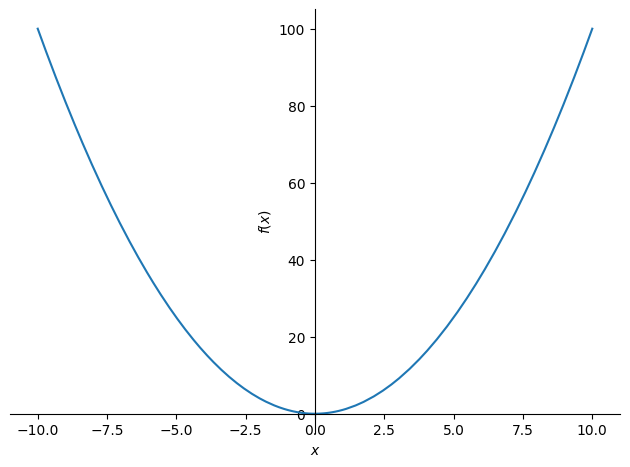

In [10]:
from sympy import plot

x = symbols('x')

p1 = plot(x*x)

Se le pueden dar múltiples funciones a `plot`.



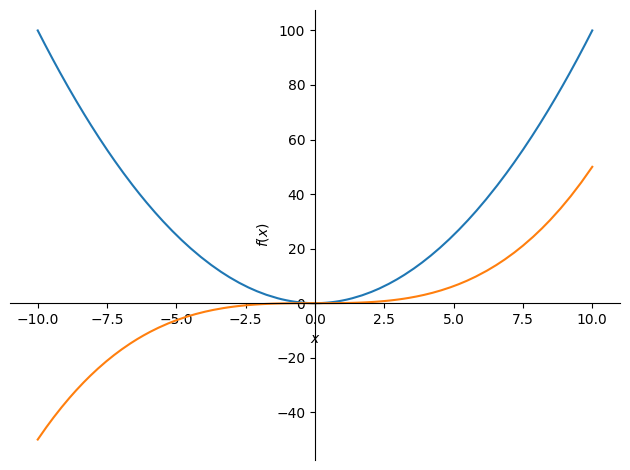

In [11]:
from sympy import plot

x = symbols('x')

p1 = plot(x**2, x**3/20)

El intervalo de variación de la variable se puede especificar con una tupla.



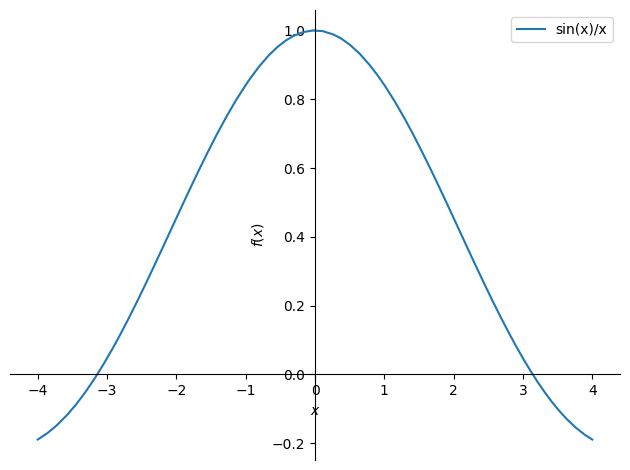

In [12]:
from sympy import sin, symbols

x = symbols('x')

expr = sin(x)/x

p1 = plot(expr, (x, -4 ,4), legend=True, label=repr(expr))

Para graficar dos funciones en un mismo plano, también se pueden dejar indicados los comandos `plot`, y después juntarlos. Para mostrar el dibujo se usa el método `show`.



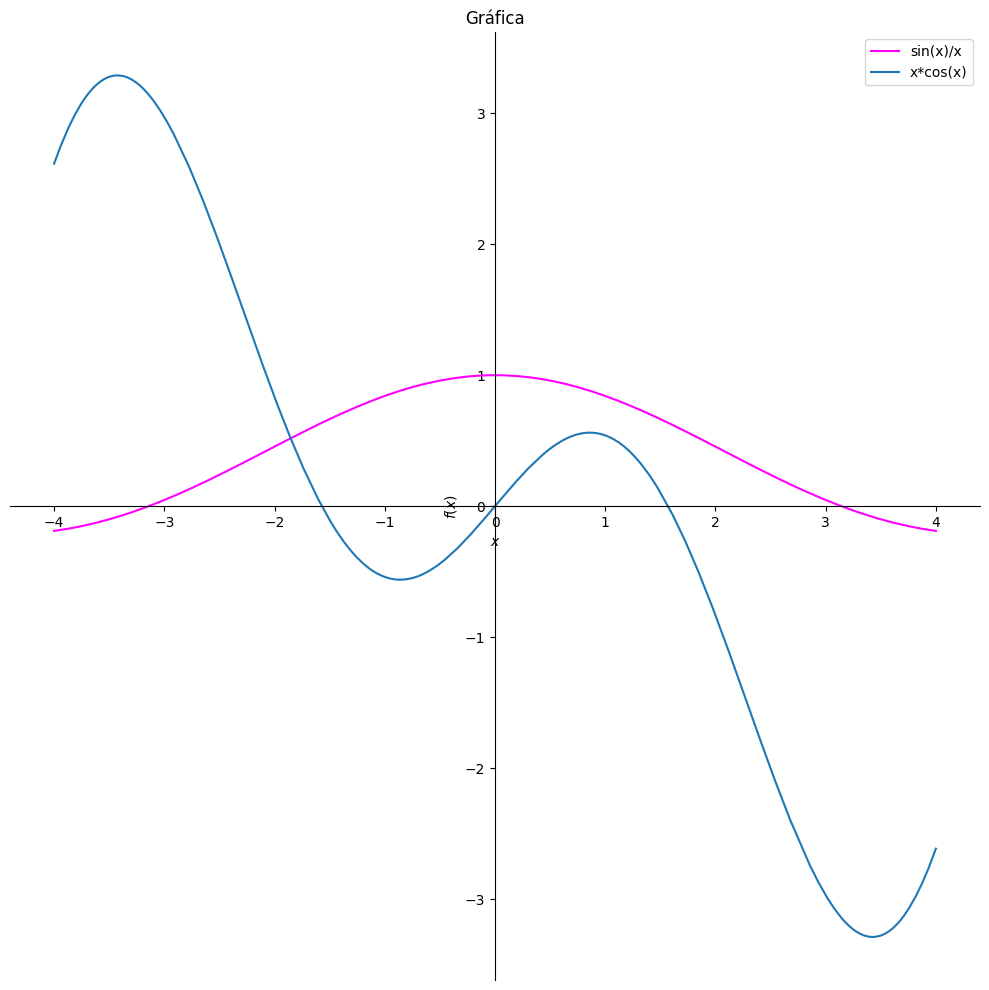

In [13]:
from sympy import cos

p1 = plot(expr, (x, -4 ,4), show=False, legend=True, label=repr(expr), line_color='magenta', title="Gráfica", size=(10, 10))
p2 = plot(x*cos(x), (x, -4 ,4), show=False, legend=True, label=repr(x*cos(x)))
p1.append(p2[0])
p1.show()

In [14]:
from sympy import plot

plot?

Vamos a graficar soluciones de sistemas de ecuaciones diferenciales.



In [15]:
t = symbols('t')
x, y = symbols('x y', cls=Function)
eq1 = Eq(Derivative(x(t), t), 2*x(t) + y(t))
eq2 = Eq(Derivative(y(t), t), x(t) + 2*y(t))

sols = dsolve((eq1, eq2))
sols, sols[0], sols[0].rhs, sols[0].rhs, type(sols[0].rhs)

([Eq(x(t), -C1*exp(t) + C2*exp(3*t)), Eq(y(t), C1*exp(t) + C2*exp(3*t))],
 Eq(x(t), -C1*exp(t) + C2*exp(3*t)),
 -C1*exp(t) + C2*exp(3*t),
 -C1*exp(t) + C2*exp(3*t),
 sympy.core.add.Add)

Daremos valores a las constantes `C1`, `C2` para poder graficar las dos funciones que componen la solución del sistema.



In [16]:
C1, C2 = symbols('C1 C2')
dict_subs = {C1:2, C2:-1}
expr1 = sols[0].rhs.subs(dict_subs)
expr2 = sols[1].rhs.subs(dict_subs)
expr1, expr2

⎛   3⋅t      t     3⋅t      t⎞
⎝- ℯ    - 2⋅ℯ , - ℯ    + 2⋅ℯ ⎠

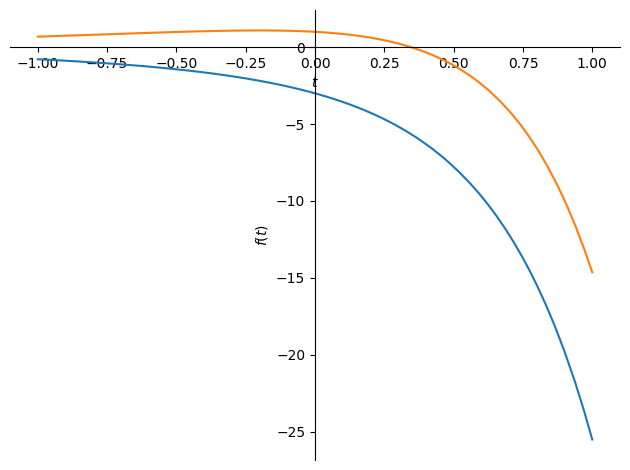

In [17]:
p1 = plot(expr1, (t, -1, 1), show=False)
p2 = plot(expr2, (t, -1, 1), show=False)
p1.append(p2[0])
p1.show()

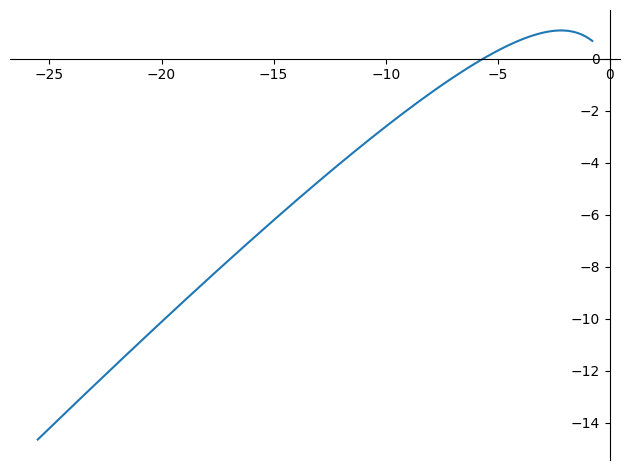

In [18]:
from sympy import plot_parametric

plot_parametric((expr1, expr2), (t, -1, 1))

Aquí vemos otro ejemplo conocido:



In [19]:
eq1 = Eq(Derivative(x(t), t), y(t))
eq2 = Eq(Derivative(y(t), t), - x(t))

sols = dsolve((eq1, eq2))
sols[0], sols[1]

(x(t) = C₁⋅sin(t) + C₂⋅cos(t), y(t) = C₁⋅cos(t) - C₂⋅sin(t))

In [20]:
dict_subs = {C1:1, C2:0}
expr1 = sols[0].rhs.subs(dict_subs)
expr2 = sols[1].rhs.subs(dict_subs)
expr1, expr2

(sin(t), cos(t))

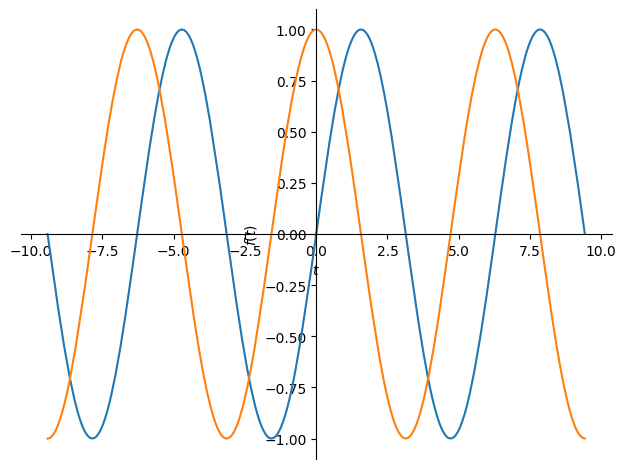

In [21]:
from sympy import pi

p1 = plot(expr1, (t, -3*pi, 3*pi), show=False)
p2 = plot(expr2, (t, -3*pi, 3*pi), show=False)
p1.append(p2[0])
p1.show()

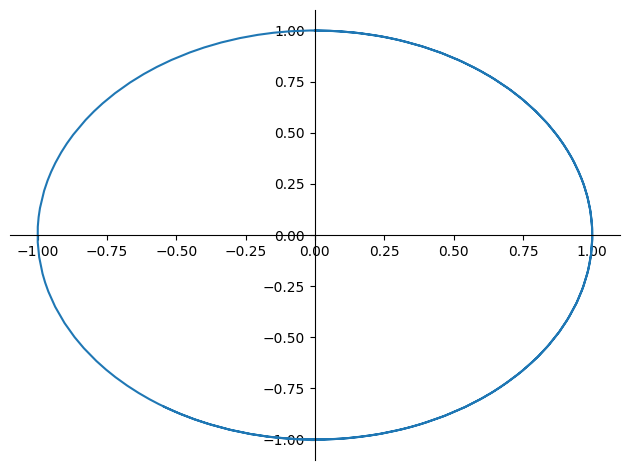

In [22]:
from sympy import plot_parametric

plot_parametric((expr1, expr2), (t, 0, 10))

## Tarea



Nosotros hemos dado valores a las constantes `C1`, `C2` para poder graficar las soluciones. Sin embargo, en la práctica, esas constantes dependen de las condiciones iniciales, y para encontrarlas, debe resolverse un sistema de ecuaciones lineales. Consideremos, por ejemplo, el primer sistema que vimos. De la siguiente manera podemos encontrar el sistema lineal que determina las constantes en términos de las condiciones iniciales, el cual se resuelve usando la función `solve`. Nótese que las condiciones iniciales propuestas son $x(0)=2$, $y(0)=-1$.



In [23]:
eq1 = Eq(Derivative(x(t), t), 2*x(t) + y(t))
eq2 = Eq(Derivative(y(t), t), x(t) + 2*y(t))

sols = dsolve((eq1, eq2))

lineal1 = Eq(sols[0].subs({t:0}).rhs, 2)
lineal2 = Eq(sols[1].subs({t:0}).rhs, -1)
lineal1, lineal2

(-C₁ + C₂ = 2, C₁ + C₂ = -1)

In [25]:
from sympy import solve

solve((lineal1, lineal2), (C1, C2))

{C₁: -3/2, C₂: 1/2}

La **tarea** consiste en definir una función (o una serie de funciones), tal que, dada una lista de dos listas de dos números (que represente una matriz $A$, por ejemplo `A=[[1, 2], [3, 4]]`), y una lista de dos números (que representa las condiciones iniciales $(x_{0},y_{0})$ en $t=0$, por ejemplo, `v=[2,-1]`, regrese la solución del sistema de ecuaciones diferenciales (como una pareja de  funciones de $t$):

\begin{equation}
\label{eq:1}
\begin{pmatrix}
x'(t)\\
y'(t)
\end{pmatrix}=
A\begin{pmatrix}
x(t)\\
y(t)
\end{pmatrix}=
\begin{pmatrix}
A_{11}x(t) + A_{12}y(t)\\
A_{21}x(t) + A_{22}y(t)
\end{pmatrix}
\end{equation}

que satisfaga las condiciones iniciales $x(0)=x_{0}$, $y(0)=y_{0}$.

